In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
df_2d = pd.read_csv("data_2d.csv", header=None)

df_2d.describe()
#df_mnist.describe()

,0,1,2
count,200.000000,200.000000,200.000000
mean,0.500000,1.758886,2.211502
std,0.501255,1.239986,1.605176
min,0.000000,-1.488928,-1.344141
25%,0.000000,0.874456,0.955211
50%,0.500000,1.729753,2.282891
75%,1.000000,2.701499,3.602253
max,1.000000,4.554605,5.722027


З опису датасету схоже, що нульова колонка - категорія (0 або 1)
Перейменуємо колонки і трохи помалюємо

In [3]:
df_2d.columns = ["category", "X1", "X2"]

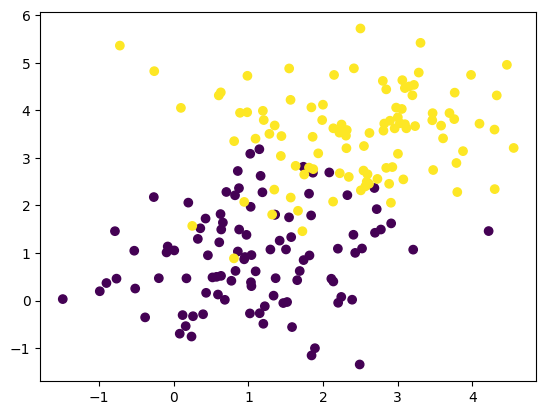

In [4]:
plt.figure()
plt.scatter(df_2d["X1"], df_2d["X2"], c=df_2d["category"])

plt.show()


Досвіду визначити необхідність нормалізації не вистачає, тож спробуємо нормалізувати і прогнати алгоритми на ненормалізованому та нормалізованому датасетах, побачимо що з того вийде


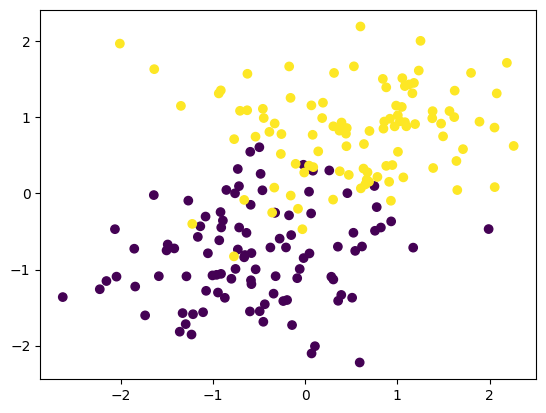

In [5]:
X_norm = StandardScaler().fit_transform(X=df_2d[["X1", "X2"]])
#plt.figure()
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=df_2d["category"])

plt.show()


Проганяємо KMeans і дивимось на результати.

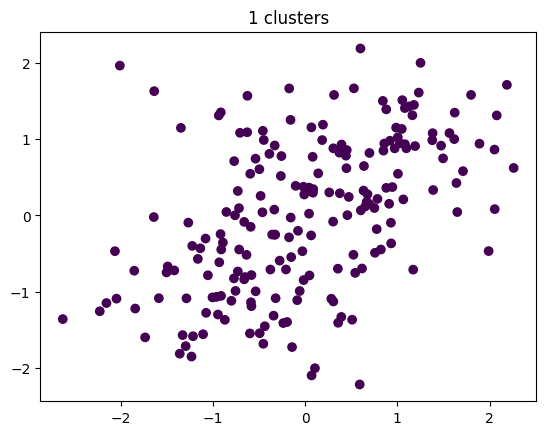

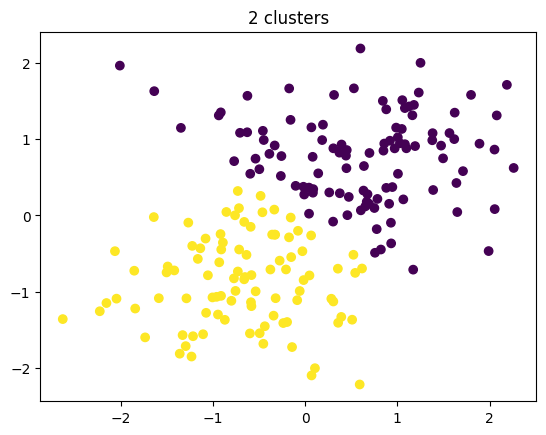

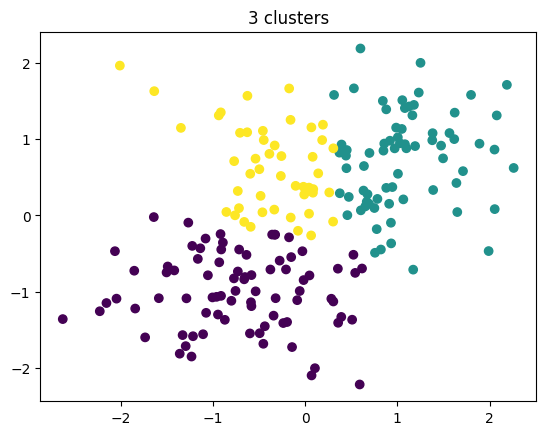

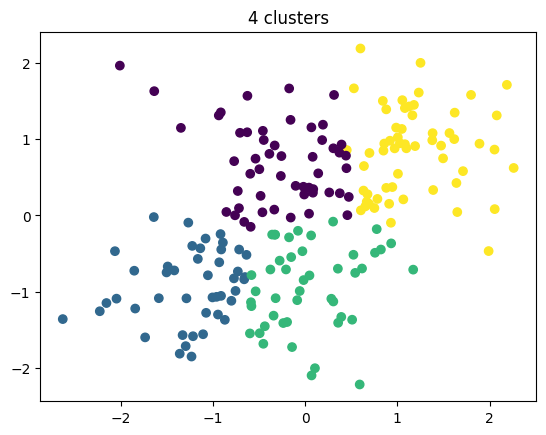

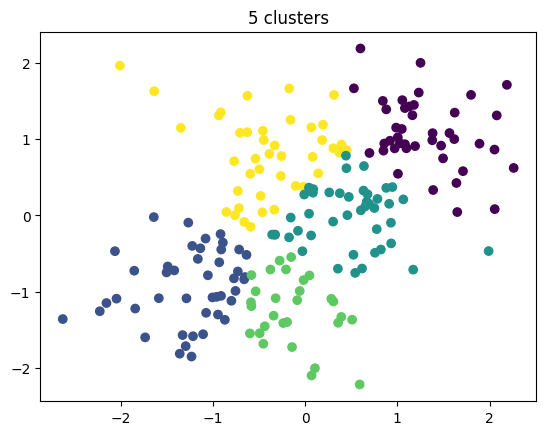

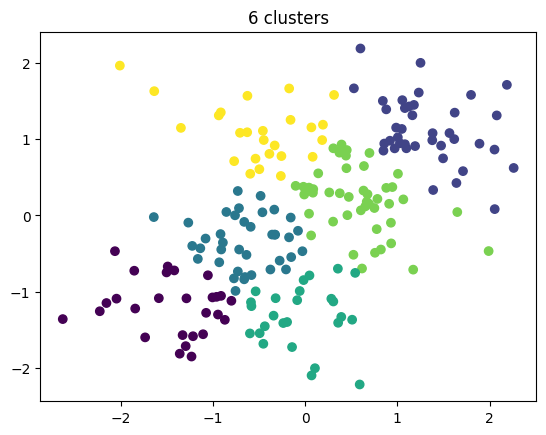

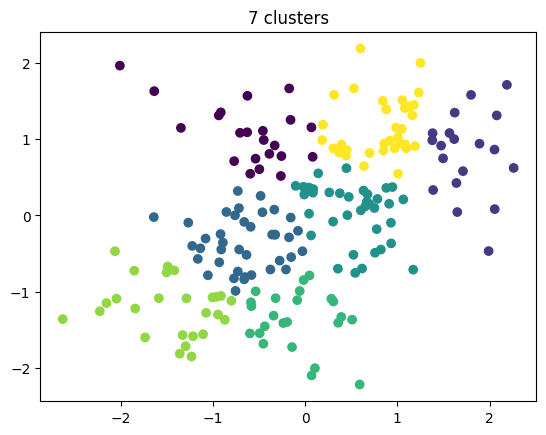

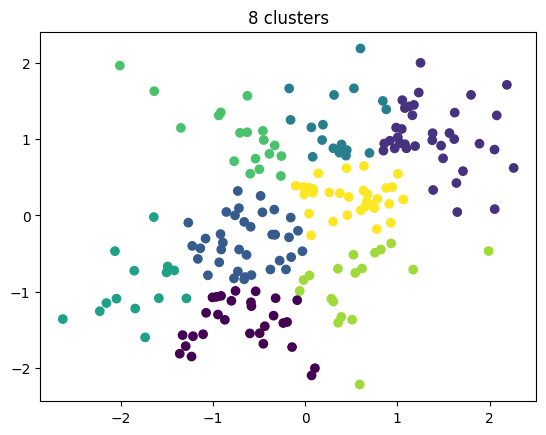

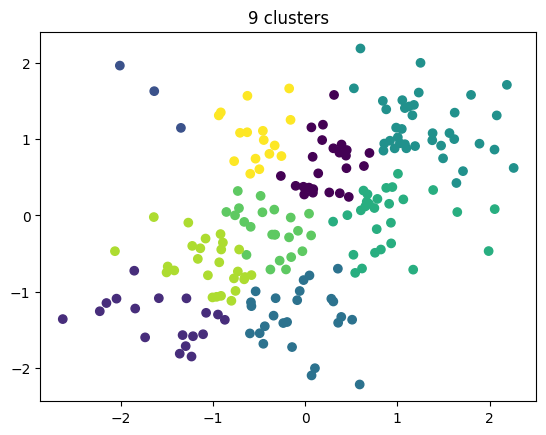

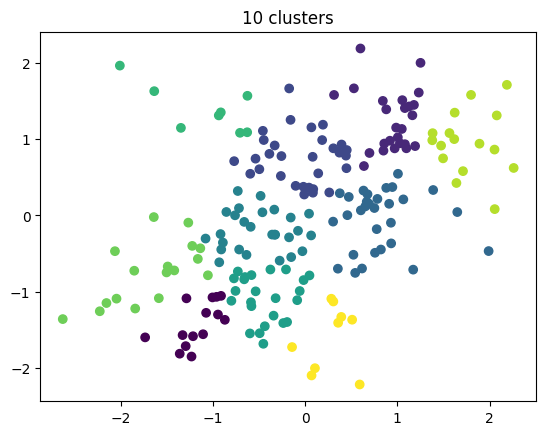

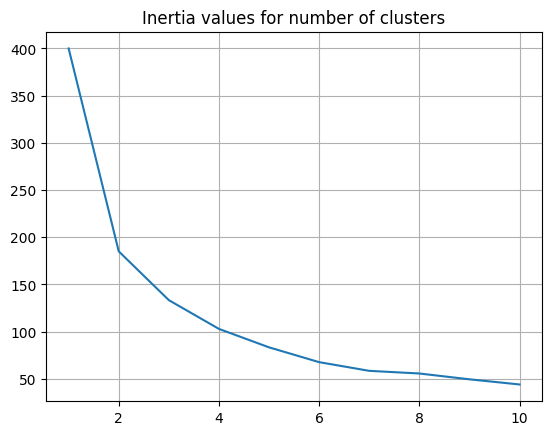

In [6]:
cost_list = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto").fit(X_norm)
    cost_list.append(kmeans.inertia_)
    #plt.figure()
    plt.scatter(X_norm[:, 0], X_norm[:, 1], c=kmeans.labels_)
    plt.title(label=f"{n_clusters} clusters")
    plt.show()

plt.plot(range(1, 11), cost_list)
plt.title("Inertia values for number of clusters")
plt.grid()

Візулально видно, що за ліктевим методом найоптимальнішою кількістю кластерів є 2, що схоже на значення нульової колонки датасету

Попрацюємо з другим датасетом

In [7]:
df_mnist = pd.read_csv("mnist.csv", header=None)
df_descr = df_mnist.describe().T

Стандартний опис не надав багато інформації.

Можна зауважити, що перша колонка має значення від 0 до 9.
Є пусті колонки, що містять тільки нулі.
Для більшості непустих колонок характерні мінімальне значення 0 і максимальне 255, але це не точно

З огляду на назву файлу, припустимо, що в першій колонці у нас категорія (цифра)

In [8]:
# X_norm = StandardScaler().fit_transform(X=df_2d[["X1", "X2"]])
# #plt.figure()
# plt.scatter(X_norm[:, 0], X_norm[:, 1], c=df_2d["category"])

# plt.show()

df_mnist_X = df_mnist[df_mnist.columns[1:]]
df_mnist_Y = df_mnist[df_mnist.columns[0]]
X_minst_norm = StandardScaler().fit_transform(df_mnist_X)

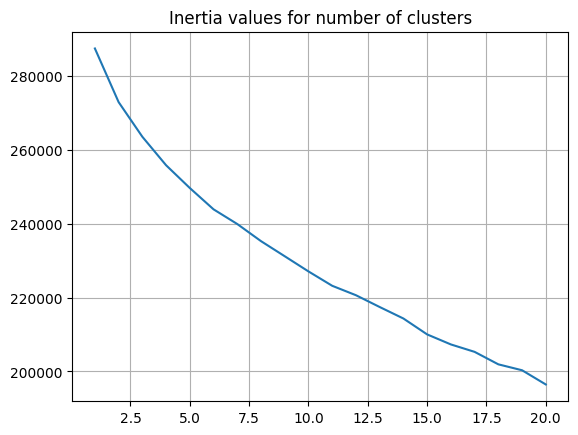

In [9]:
cost_mnist_list = []
kmeans_list = []

# Припускаємо, що кластерів може бути до 10
for n_clusters in range(1, 21):
    kmeans = KMeans(n_clusters=n_clusters, n_init=100, max_iter=10000, verbose=0).fit(X_minst_norm)
    cost_mnist_list.append(kmeans.inertia_)
    kmeans_list.append(kmeans)
    #plt.figure()
    # plt.scatter(X_norm[:, 0], X_norm[:, 1], c=kmeans.labels_)
    # plt.title(label=f"{n_clusters} clusters")
    # plt.show()

plt.plot(range(1, 21), cost_mnist_list)
plt.title("Inertia values for number of clusters")
plt.grid()

На гіперпараметрах по замовчуванню кожен прогон давав непередбачуваний результат і за даними графіка неможливо було виявити оптимальну кількість кластерів.
Збільшивши параметри n_init=100 та max_iter=10000 вдалося досягти відтворюваного результату зі стабільними кутами для n_clusters = 2 та 10. Час від часу з'являються кути після 15, але стабільного відтворюваного результату досягти не вдалося

Спробуємо побудувати візуалізацію по даним обраних моделей із застосуванням PCA



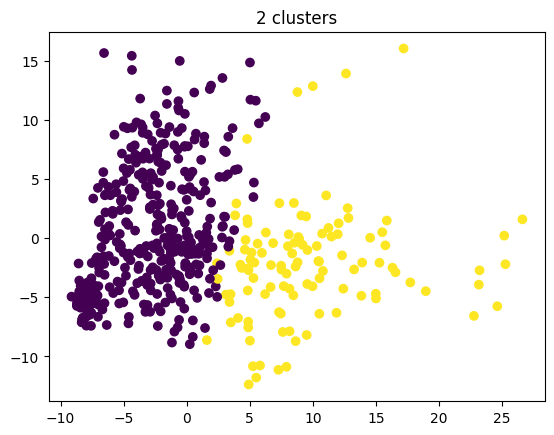

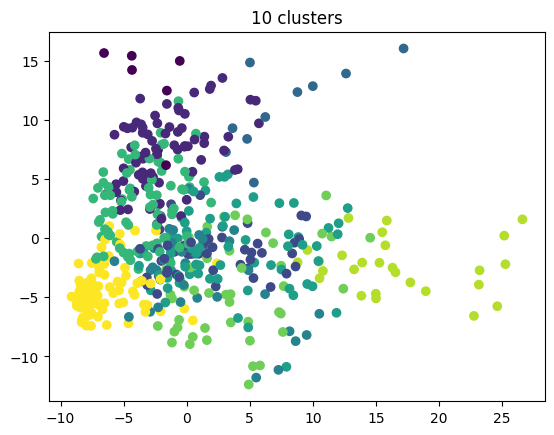

In [10]:
pca = PCA(n_components=2)

principal_X = pca.fit_transform(X_minst_norm)

plt.scatter(principal_X[:, 0], principal_X[:, 1], c=kmeans_list[1].labels_)
plt.title("2 clusters")
plt.show()

plt.scatter(principal_X[:, 0], principal_X[:, 1], c=kmeans_list[9].labels_)
plt.title("10 clusters")
plt.show()

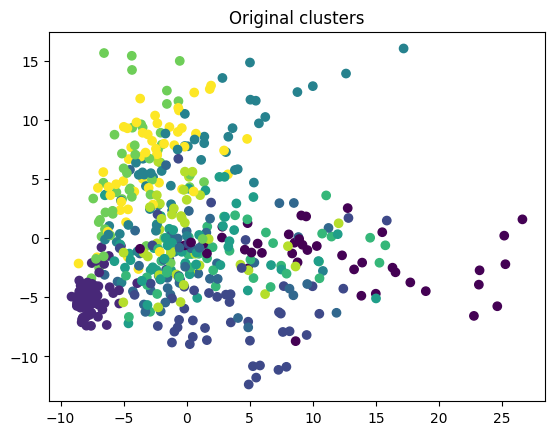

In [11]:

plt.scatter(principal_X[:, 0], principal_X[:, 1], c=df_mnist_Y)
plt.title("Original clusters")
plt.show()

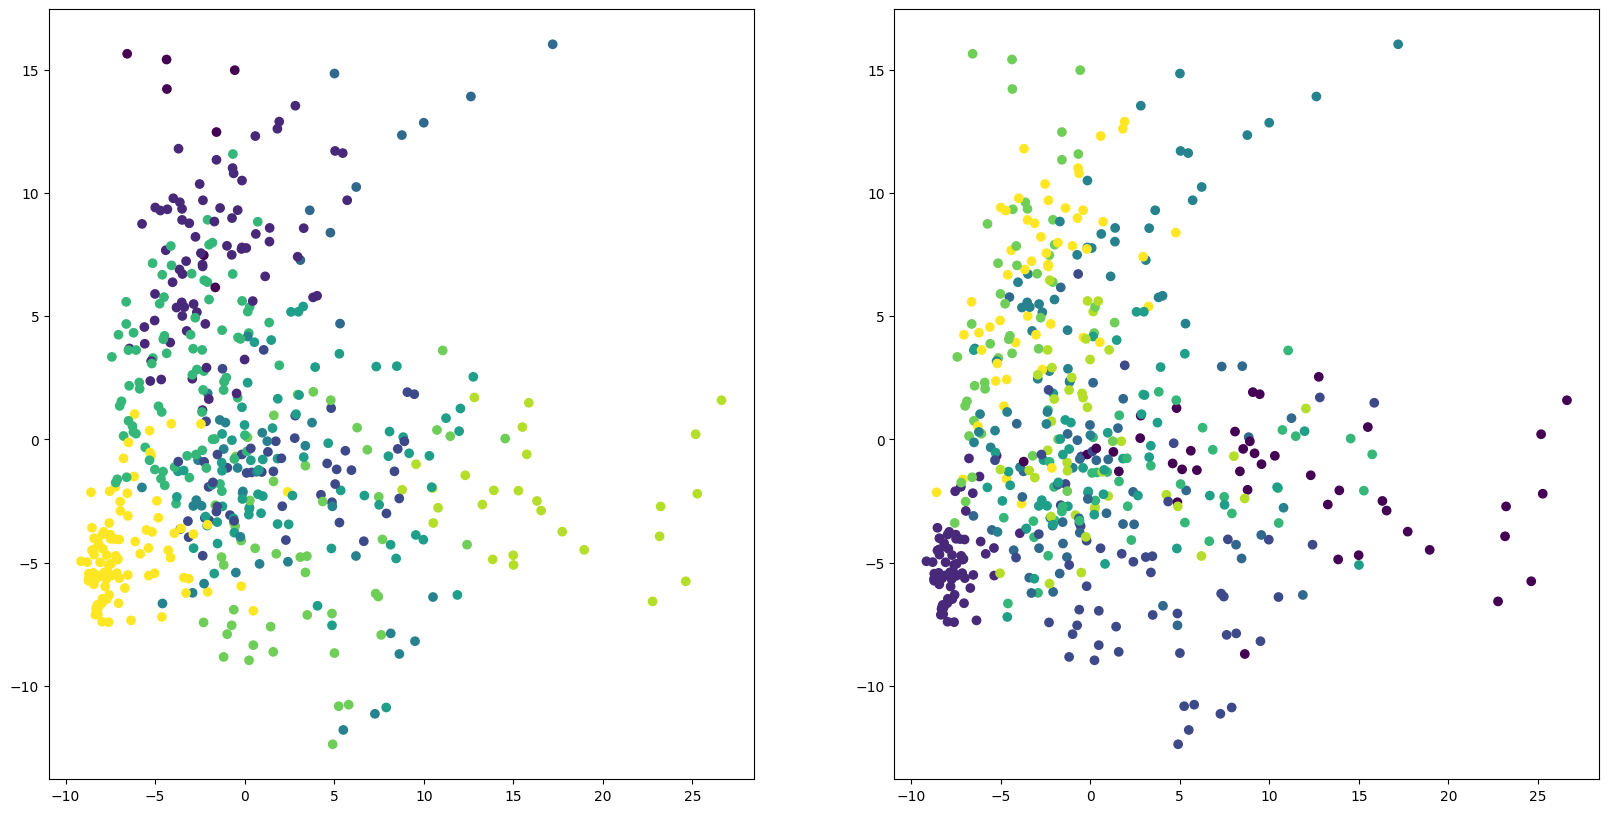

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs[0].scatter(principal_X[:, 0], principal_X[:, 1], c=(kmeans_list[9].labels_))
axs[1].scatter(principal_X[:, 0], principal_X[:, 1], c=df_mnist_Y)
plt.show()


При навчанні моделі ми не можемо визначити, який з кластерів отримає яку мітку (номер)
Повертаючись до нашого припущення, що перша колонка датасету відповідає мітці кластера, і порівнюючи зображення, можна сказати, що визначені кластери схожі на ті, які закладались в датасеті